In [2]:
from collections import Counter
import numpy as np
from sys import maxsize

from coolingUnitary import CoolingUnitary
from occupationProbabilitiesList import OccupationProbabilitiesList
from mirrorProtocol import MirrorProtocolUnitary
from mirrorProtocol import MirrorProtocolCircuit
from partnerPairingAlgorithm import PartnerPairingAlgorithmUnitary
from partnerPairingAlgorithm import PartnerPairingAlgorithmCircuit
from minimalWorkProtocol import MinimalWorkProtocolUnitary
from minimalWorkProtocol import MinimalWorkProtocolCircuit
from subOptimalCooling import SubOptimalCoolingCircuit
from greedyCooling import GreedyCoolingCircuit
from workCost import WorkCost
from heatBathAlgorithmicCooling import HeatBathAlgorithmicCoolingCircuit
#from coolingCircuit import CoolingCircuit
from utils import *
from quantumUtils import *

from qiskit.circuit.library import UnitaryGate

In [3]:
a = PartnerPairingAlgorithmUnitary(5)
checkUnitary2(a.toarray(),0.1)

00 | 00000 --> 00000 | 0.5904900000000001
01 | 00001 --> 00001 | 0.06561
02 | 00010 --> 00010 | 0.06561
03 | 00011 --> 10000 | 0.06561 (*)
04 | 00100 --> 00100 | 0.06561
05 | 00101 --> 01000 | 0.06561 (*)
06 | 00110 --> 00110 | 0.007290000000000002
07 | 00111 --> 11000 | 0.007290000000000002 (*)
08 | 01000 --> 00101 | 0.007290000000000002 (*)
09 | 01001 --> 01001 | 0.007290000000000002
10 | 01010 --> 01010 | 0.007290000000000002
11 | 01011 --> 10100 | 0.007290000000000002 (*)
12 | 01100 --> 01100 | 0.007290000000000002
13 | 01101 --> 10010 | 0.007290000000000002 (*)
14 | 01110 --> 10001 | 0.007290000000000002 (*)
15 | 01111 --> 00011 | 0.007290000000000002 (*)
-------------------------
16 | 10000 --> 11100 | 0.0008100000000000003 (*)
17 | 10001 --> 01110 | 0.0008100000000000003 (*)
18 | 10010 --> 01101 | 0.0008100000000000003 (*)
19 | 10011 --> 10011 | 0.0008100000000000003
20 | 10100 --> 01011 | 0.0008100000000000003 (*)
21 | 10101 --> 10101 | 0.0008100000000000003
22 | 10110 --> 1011

In [4]:
b = MirrorProtocolUnitary(5,0.1)
checkUnitary2(b.toarray(),0.1)

00 | 00000 --> 00000 | 0.5904900000000001
01 | 00001 --> 00001 | 0.06561
02 | 00010 --> 00010 | 0.06561
03 | 00011 --> 00011 | 0.007290000000000002
04 | 00100 --> 00100 | 0.06561
05 | 00101 --> 00101 | 0.007290000000000002
06 | 00110 --> 00110 | 0.007290000000000002
07 | 00111 --> 11000 | 0.007290000000000002 (*)
08 | 01000 --> 01000 | 0.06561
09 | 01001 --> 01001 | 0.007290000000000002
10 | 01010 --> 01010 | 0.007290000000000002
11 | 01011 --> 10100 | 0.007290000000000002 (*)
12 | 01100 --> 01100 | 0.007290000000000002
13 | 01101 --> 10010 | 0.007290000000000002 (*)
14 | 01110 --> 10001 | 0.007290000000000002 (*)
15 | 01111 --> 10000 | 0.06561 (*)
-------------------------
16 | 10000 --> 01111 | 9.000000000000002e-05 (*)
17 | 10001 --> 01110 | 0.0008100000000000003 (*)
18 | 10010 --> 01101 | 0.0008100000000000003 (*)
19 | 10011 --> 10011 | 0.0008100000000000003
20 | 10100 --> 01011 | 0.0008100000000000003 (*)
21 | 10101 --> 10101 | 0.0008100000000000003
22 | 10110 --> 10110 | 0.000810

In [5]:
c = MinimalWorkProtocolUnitary(5,0.1)
checkUnitary2(c.toarray(),0.1)

00 | 00000 --> 00000 | 0.5904900000000001
01 | 00001 --> 00001 | 0.06561
02 | 00010 --> 00010 | 0.06561
03 | 00011 --> 10000 | 0.06561 (*)
04 | 00100 --> 00100 | 0.06561
05 | 00101 --> 00101 | 0.007290000000000002
06 | 00110 --> 00110 | 0.007290000000000002
07 | 00111 --> 11000 | 0.007290000000000002 (*)
08 | 01000 --> 01000 | 0.06561
09 | 01001 --> 01001 | 0.007290000000000002
10 | 01010 --> 01010 | 0.007290000000000002
11 | 01011 --> 10100 | 0.007290000000000002 (*)
12 | 01100 --> 01100 | 0.007290000000000002
13 | 01101 --> 10010 | 0.007290000000000002 (*)
14 | 01110 --> 10001 | 0.007290000000000002 (*)
15 | 01111 --> 00011 | 0.007290000000000002 (*)
-------------------------
16 | 10000 --> 11100 | 0.0008100000000000003 (*)
17 | 10001 --> 01110 | 0.0008100000000000003 (*)
18 | 10010 --> 01101 | 0.0008100000000000003 (*)
19 | 10011 --> 10011 | 0.0008100000000000003
20 | 10100 --> 01011 | 0.0008100000000000003 (*)
21 | 10101 --> 10101 | 0.0008100000000000003
22 | 10110 --> 10110 | 0.00

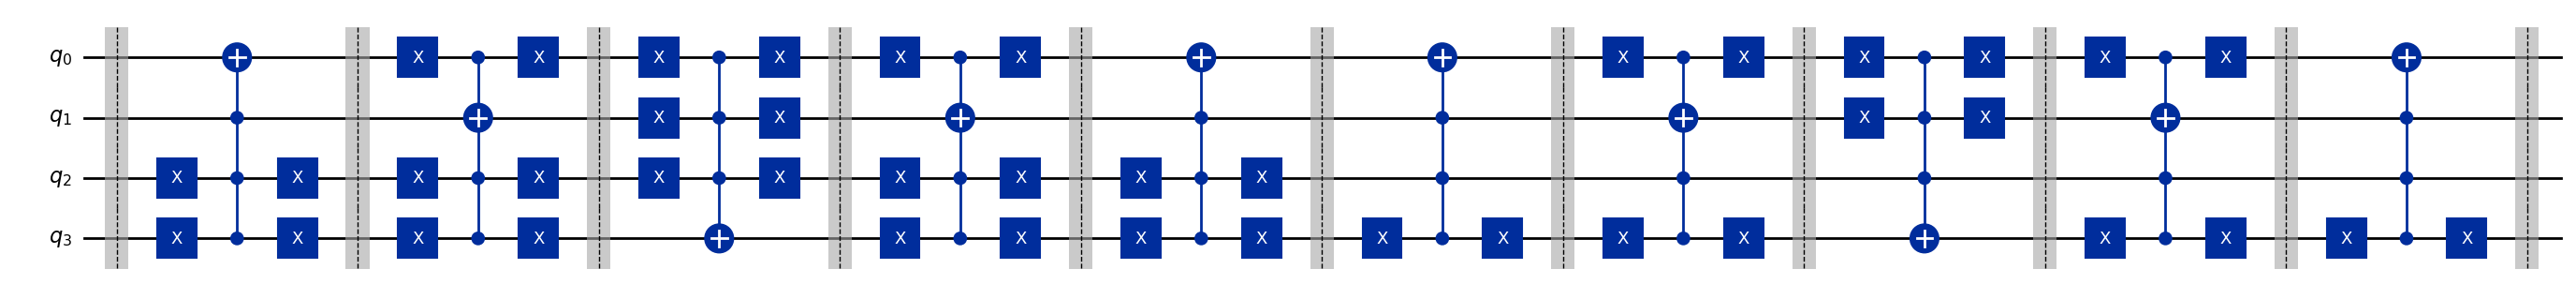

In [6]:
c = MinimalWorkProtocolCircuit(4)
c.draw("mpl",fold=maxsize)

In [7]:
testCircuit(c)

00 | 3210
---------------------
00 | 0000 --> 0000
01 | 0001 --> 0001
02 | 0010 --> 0010
03 | 0011 --> 1000 (*)
04 | 0100 --> 0100
05 | 0101 --> 0101
06 | 0110 --> 0110
07 | 0111 --> 1100 (*)
-------------------------
08 | 1000 --> 0011 (*)
09 | 1001 --> 1001
10 | 1010 --> 1010
11 | 1011 --> 1011
12 | 1100 --> 0111 (*)
13 | 1101 --> 1101
14 | 1110 --> 1110
15 | 1111 --> 1111


In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
backendName = "ibm_osaka"
sim_backend = service.backend(backendName)

IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [ ]:
""" nu = 7
c = MinimalWorkProtocol(nu)

circuit = CoolingCircuit(nu,c)
#circuit.compose(UnitaryGate(c),inplace=True)
transpiledCircuitUnitary = qk.transpile(circuit, backend=sim_backend,optimization_level=3)
#transpiledCircuitUnitary.draw("mpl",idle_wires=False)
transpiledCircuitUnitary.count_ops() """


' nu = 7\nc = MinimalWorkProtocol(nu)\n\ncircuit = CoolingCircuit(nu,c)\n#circuit.compose(UnitaryGate(c),inplace=True)\ntranspiledCircuitUnitary = qk.transpile(circuit, backend=sim_backend,optimization_level=3)\n#transpiledCircuitUnitary.draw("mpl",idle_wires=False)\ntranspiledCircuitUnitary.count_ops() '

2^23 = 230 seconds, Minimal Work

2^23 = 63 seconds, Mirror

2^22 = 254 seconds, PPA

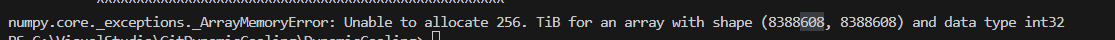

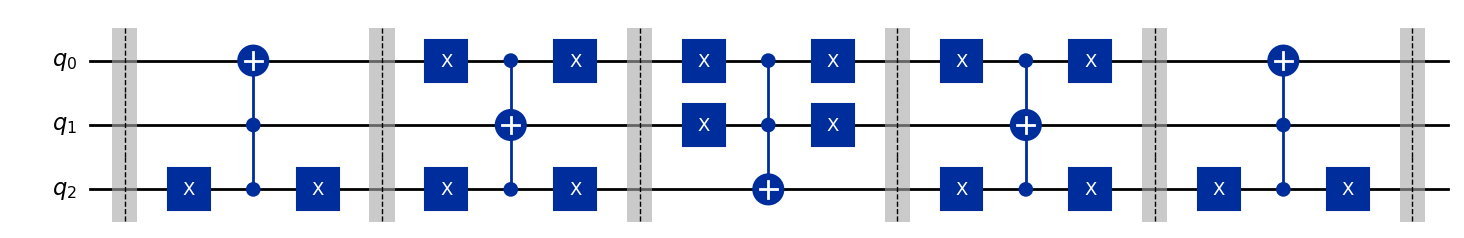

In [ ]:
n = 3
r = 1
circuit = MinimalWorkProtocolCircuit(n)
SubOptimalCoolingCircuit(circuit,r).draw("mpl",fold=maxsize)


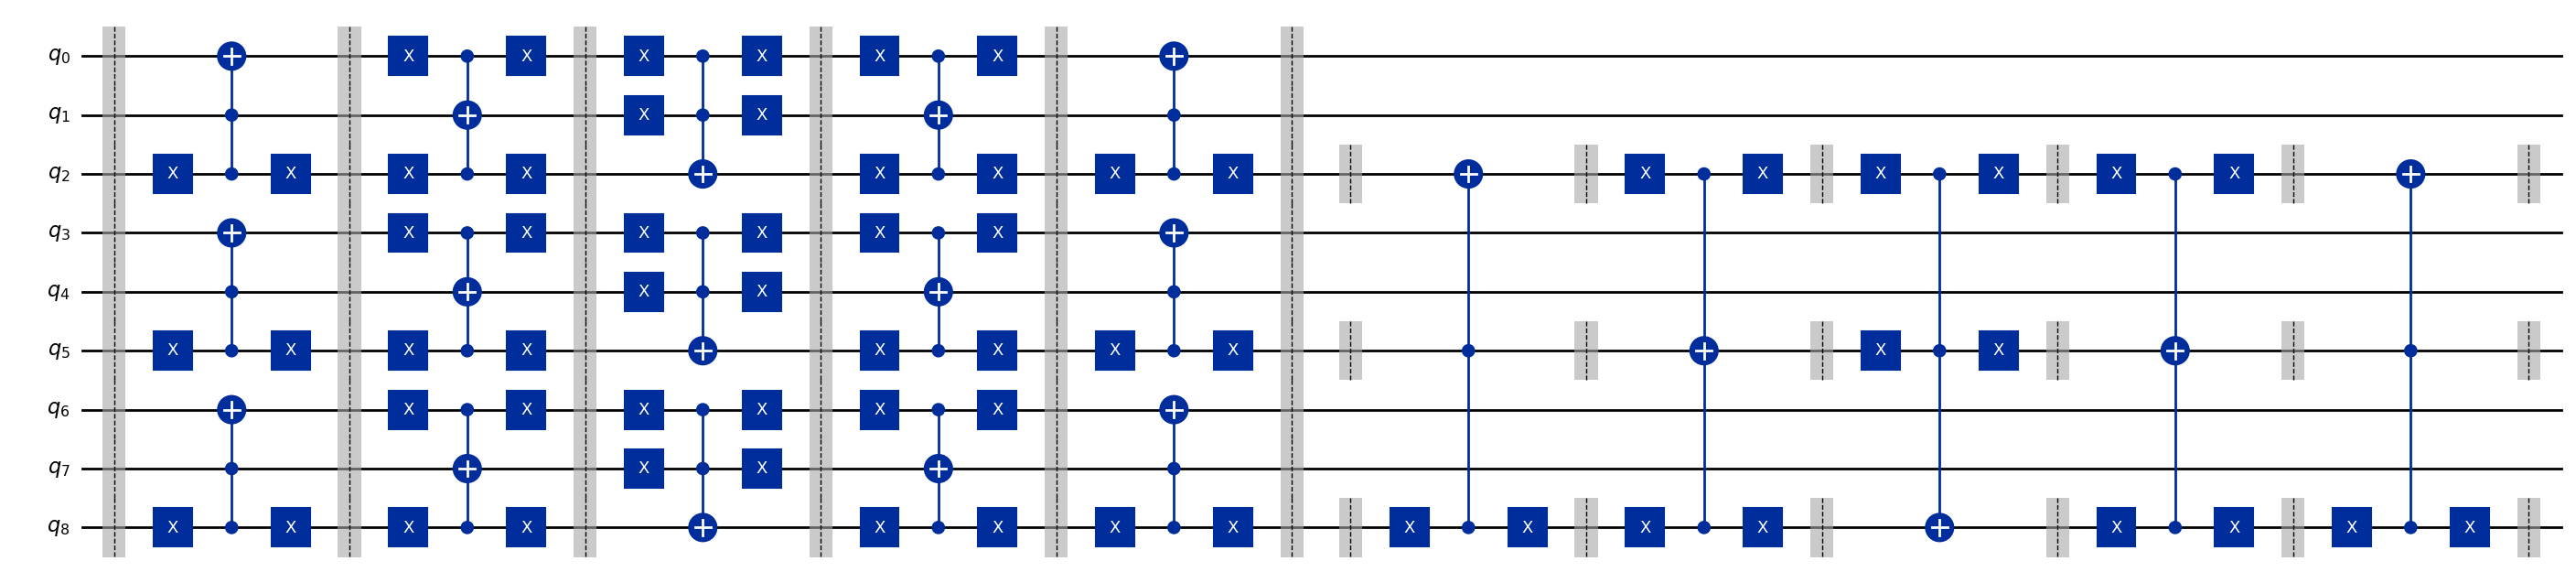

In [ ]:
n = 3
r = 2
circuit = MinimalWorkProtocolCircuit(n)
SubOptimalCoolingCircuit(circuit,r).draw("mpl",fold=maxsize)

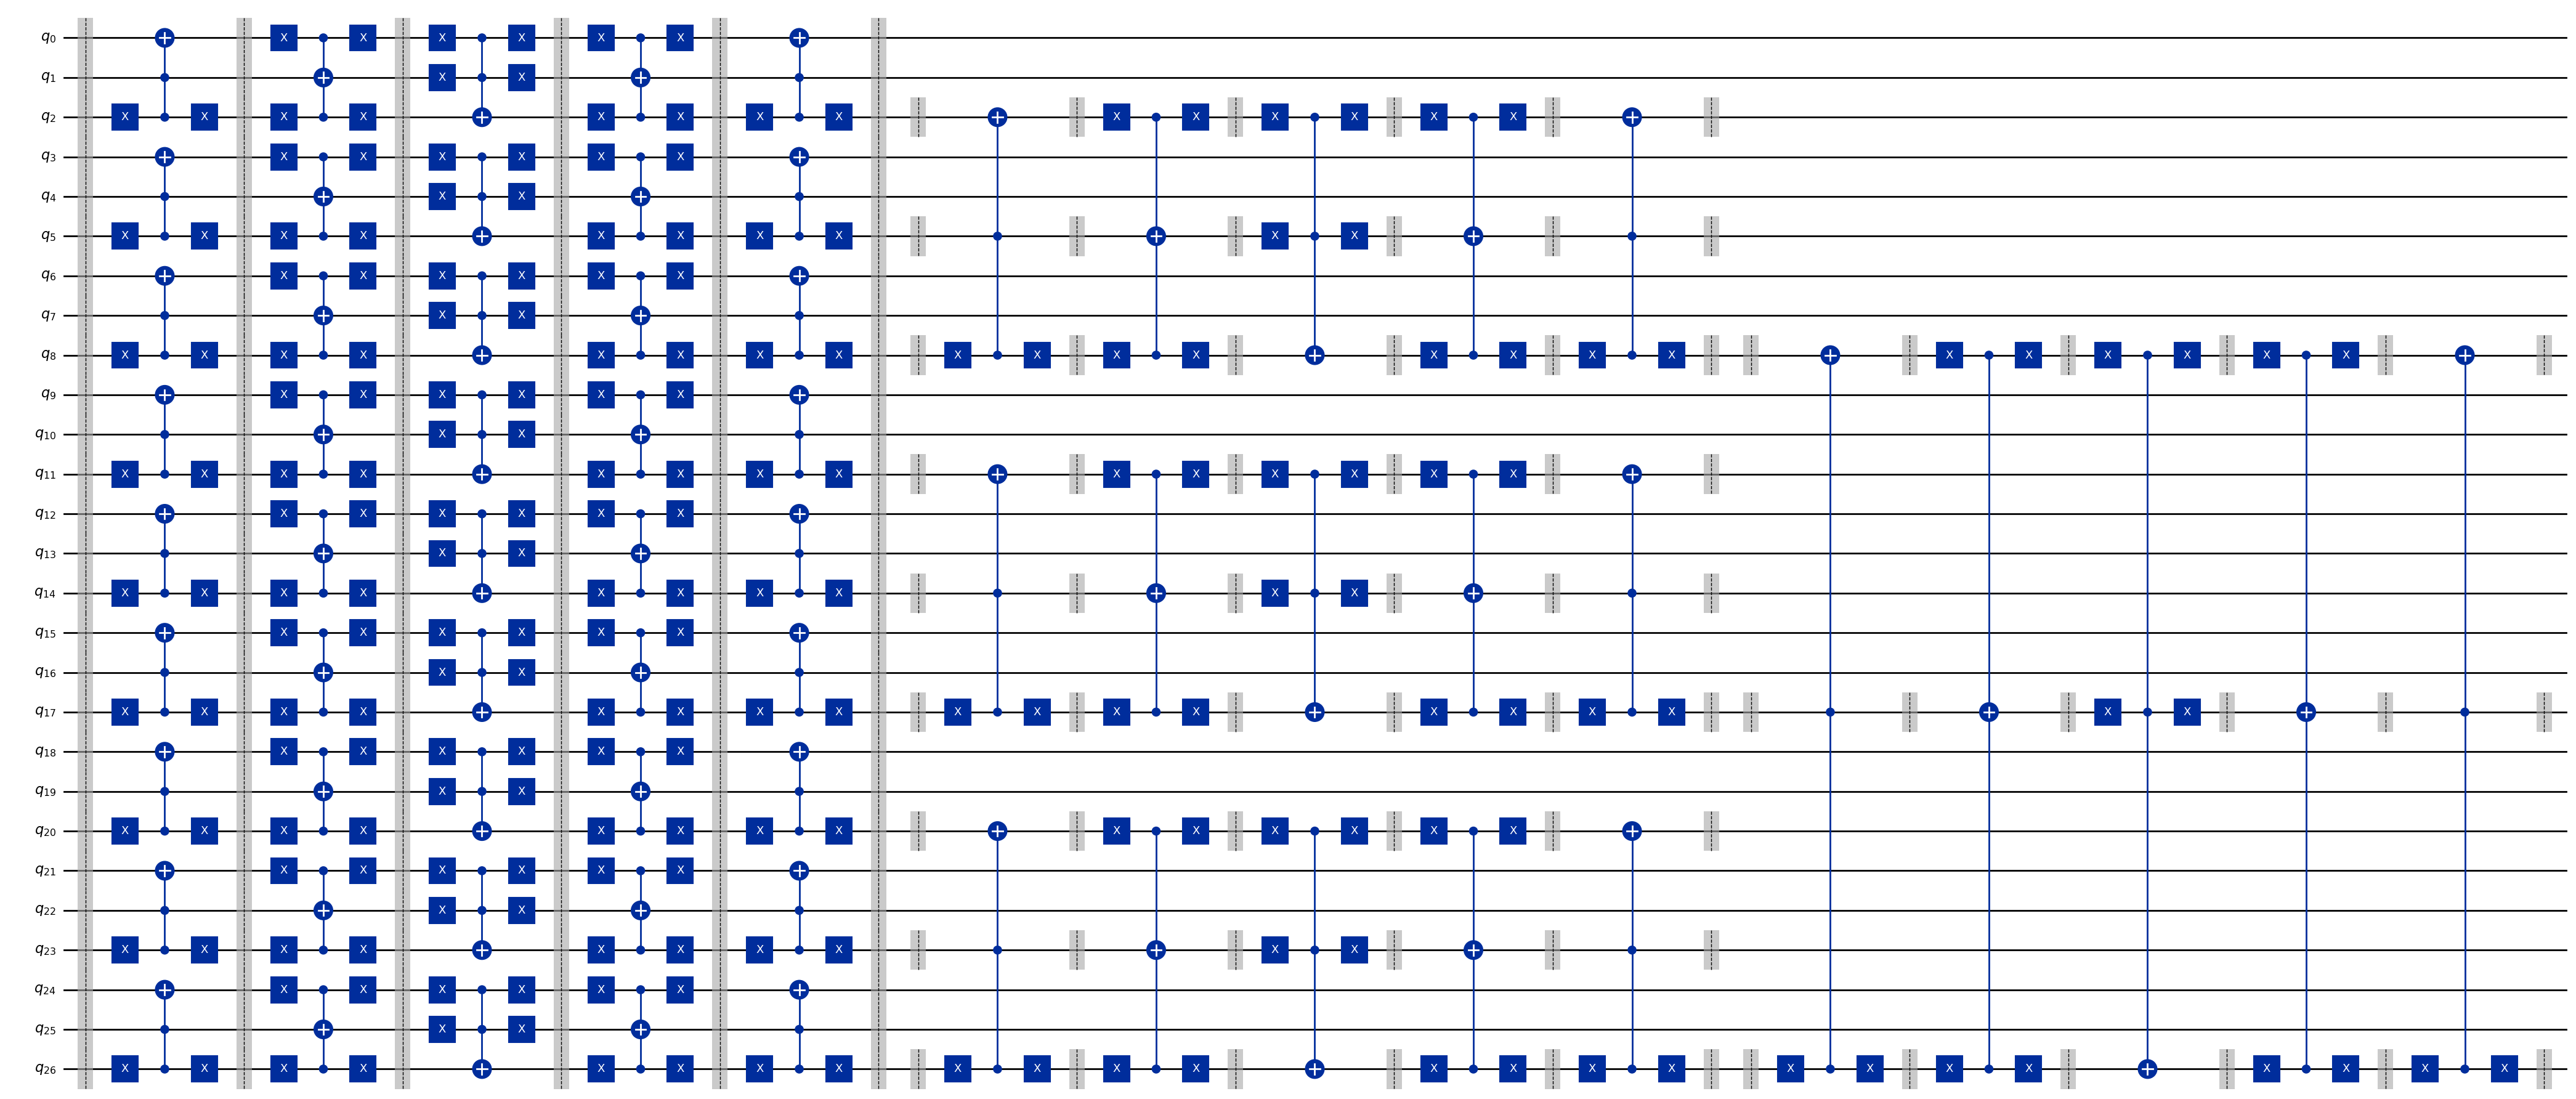

In [ ]:
n = 3
r = 3
circuit = MinimalWorkProtocolCircuit(n)
SubOptimalCoolingCircuit(circuit,r).draw("mpl",fold=maxsize)

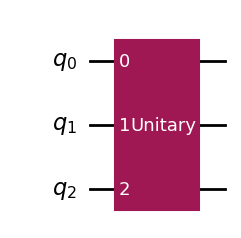

In [ ]:
n = 3
a = MinimalWorkProtocolUnitary(n)
circ = QuantumCircuit(n)
circ.compose(UnitaryGate(a.toarray()),inplace=True)
circ.draw("mpl",fold=maxsize)

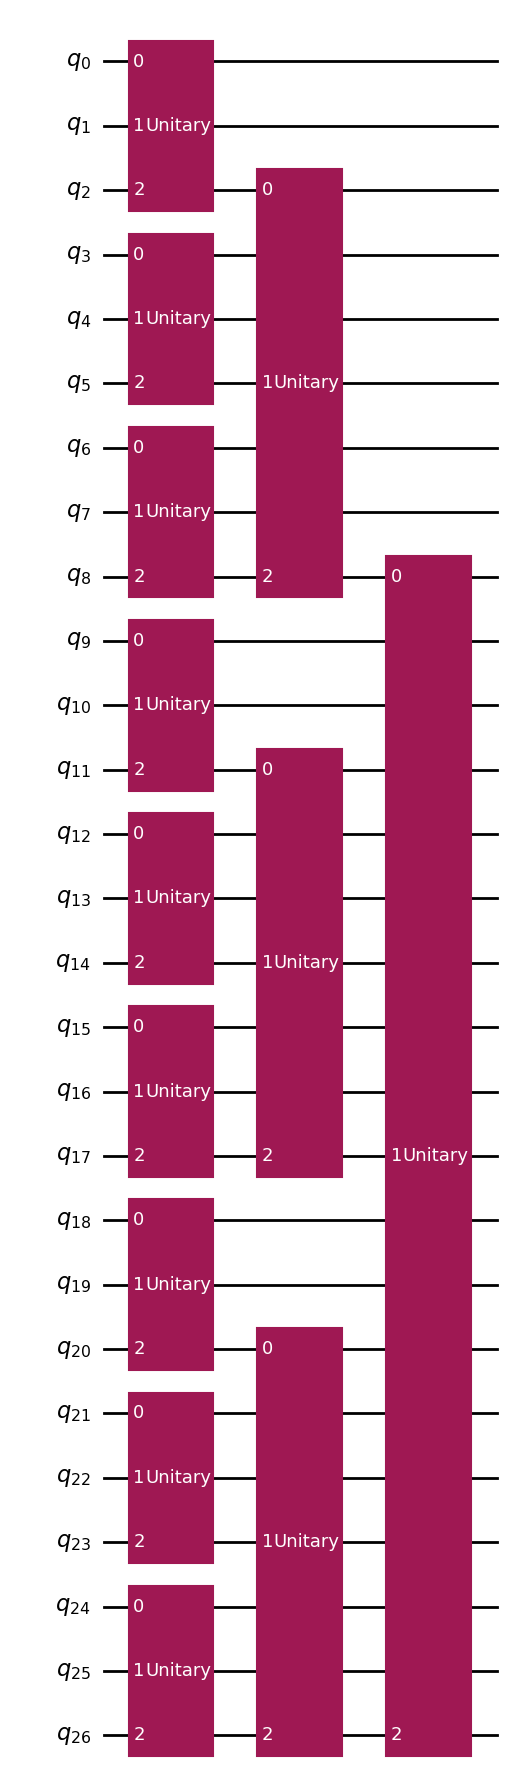

In [ ]:
circuit = SubOptimalCoolingCircuit(circ,3)
circuit.draw("mpl",fold=maxsize)

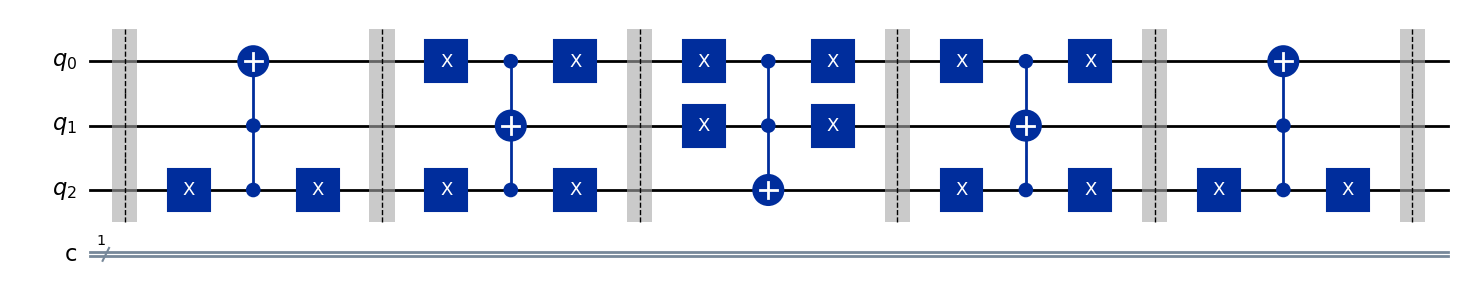

In [ ]:
GreedyCoolingCircuit(MinimalWorkProtocolCircuit(3),1).draw("mpl",fold=maxsize)

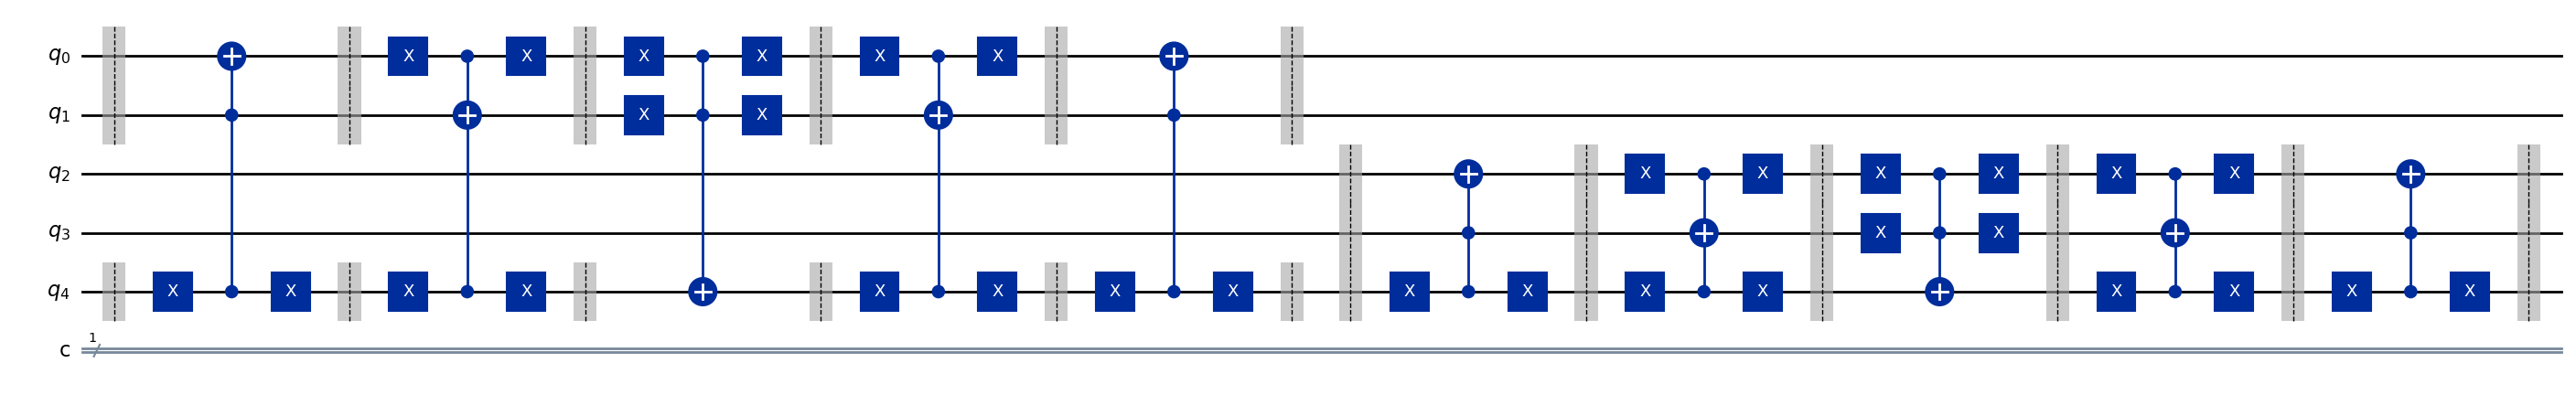

In [ ]:
GreedyCoolingCircuit(MinimalWorkProtocolCircuit(3),2).draw("mpl",fold=maxsize)

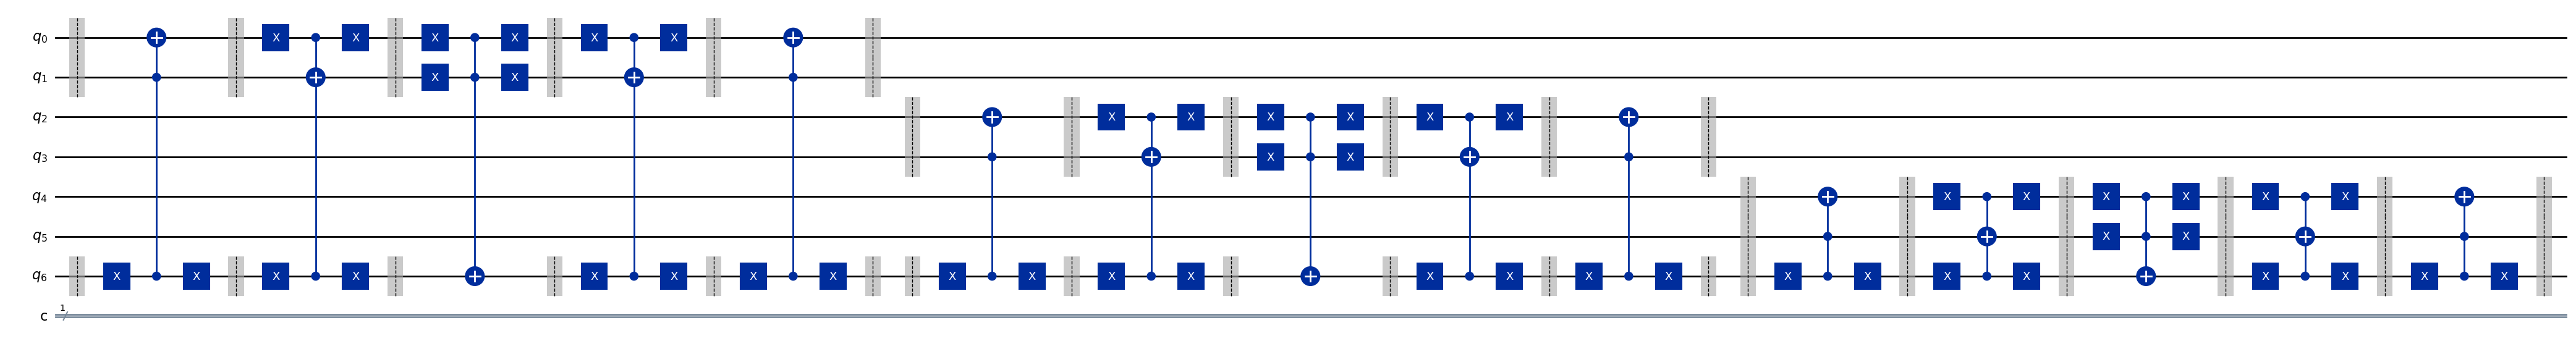

In [ ]:
GreedyCoolingCircuit(MinimalWorkProtocolCircuit(3),3).draw("mpl",fold=maxsize)

In [10]:
mat = MinimalWorkProtocolUnitary(4)
print(WorkCost(mat))

1.6000000000000005


In [4]:
HeatBathAlgorithmicCoolingCircuit(MinimalWorkProtocolCircuit(3),2).draw("mpl",fold=maxsize)

NameError: name 'HeatBathAlgorithmicCoolingCircuit' is not defined